<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/JARVIS_QuantumEspressoColab_Basic_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This example shows how to run a Quantum espresso calculations with JARVIS-Tools for silicon and add the contribution to the JARVIS-Leaderboard.

In [1]:
!pip install -q jarvis-tools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.9 MB/s eta 0:00:00


# JARVIS-Tools +Quantum Espresso workflow used in: https://www.nature.com/articles/s41524-022-00933-1 and https://pubs.acs.org/doi/abs/10.1021/acs.nanolett.2c04420

It takes about 7 minutes to install QE.

In [2]:
%%time
import os
os.chdir('/content')
# Clone the QE git
if not os.path.exists('q-e'):
   os.system('git clone https://github.com/QEF/q-e.git')
# Install the dependencies
!apt-get install -y libfftw3-3 libfftw3-dev libfftw3-doc
os.chdir('q-e')
# run the configure file
#!DFLAGS='-D__OPENMP -D__FFTW3 -D__MPI -D__SCALAPACK' FFT_LIBS='-lfftw3'  ./configure --enable-openmp

!!DFLAGS='-D__FFTW3 ' FFT_LIBS='-lfftw3'  ./configure
! make pw

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfftw3-bin libfftw3-double3 libfftw3-long3 libfftw3-quad3 libfftw3-single3
The following NEW packages will be installed:
  libfftw3-3 libfftw3-bin libfftw3-dev libfftw3-doc libfftw3-double3 libfftw3-long3 libfftw3-quad3
  libfftw3-single3
0 upgraded, 8 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,918 kB of archives.
After this operation, 26.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfftw3-double3 amd64 3.3.8-2ubuntu8 [770 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfftw3-long3 amd64 3.3.8-2ubuntu8 [335 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfftw3-single3 amd64 3.3.8-2ubuntu8 [800 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libfftw3-3 amd64 3.3.8-2ubuntu8 [1,756 B]
Get:5 http://archive.ubuntu.com

In [3]:
!ls

archive		 COUPLE			external  KCW	      make.inc	PW	       upflib
atomic		 CPV			FFTXlib   KS_Solvers  MBD	PWCOND	       UtilXlib
bin		 dev-tools		GUI	  LAXlib      Modules	QEHeat	       XClib
cmake		 dft-d3			GWW	  License     NEB	README_GPU.md  XSpectra
CMakeLists.txt	 Doc			HP	  logo.jpg    PHonon	README.md
configure	 environment_variables	include   LR_Modules  PP	TDDFPT
CONTRIBUTING.md  EPW			install   Makefile    pseudo	test-suite


In [ ]:
#!make ph

In [4]:
!lscpu

Architecture:             x86_64
  CPU op-mode(s):         32-bit, 64-bit
  Address sizes:          46 bits physical, 48 bits virtual
  Byte Order:             Little Endian
CPU(s):                   2
  On-line CPU(s) list:    0,1
Vendor ID:                GenuineIntel
  Model name:             Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:           6
    Model:                79
    Thread(s) per core:   2
    Core(s) per socket:   1
    Socket(s):            1
    Stepping:             0
    BogoMIPS:             4399.99
    Flags:                fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 cl
                          flush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc re
                          p_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3
                           fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand
                           hypervisor lahf_lm abm 3dnowprefetch i

In [5]:
# Example of filtering structures
from jarvis.core.atoms import Atoms
from jarvis.db.figshare import data
import numpy as np
import pandas as pd

dft_3d = data('dft_3d')
df=pd.DataFrame(dft_3d)
#Filter based on elements
def has_elements(atoms_dict = {}, my_element = ['Al','O']):
    atoms = Atoms.from_dict(atoms_dict)
    elements = atoms.elements
    if set(my_element)==set(elements):
        return True
    else:
        return np.nan

df['el'] = df['atoms'].apply(lambda x: has_elements(atoms_dict = x, my_element = ['Si']))
df1 = df.dropna()
df_eform_filter = df1[df1['formation_energy_peratom']==0]
df_eform_filter



Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699


100%|██████████| 40.8M/40.8M [00:01<00:00, 21.4MiB/s]


Loading the zipfile...
Loading completed.


,jid,spg_number,spg_symbol,formula,formation_energy_peratom,func,optb88vdw_bandgap,atoms,slme,magmom_oszicar,...,poisson,raw_files,nat,bulk_modulus_kv,shear_modulus_gv,mbj_bandgap,hse_gap,reference,search,el
25912,JVASP-24792,227,Fd-3m,Si,0.0,OptB88vdW,0.731,"{'lattice_mat': [[3.3641546699579417, -2.54062...",33.23,0.0,...,na,"[DFPT,JVASP-24792.zip,https://ndownloader.figs...",2,na,na,1.277,na,mp-149,-Si,True
42489,JVASP-1002,227,Fd-3m,Si,-0.0,OptB88vdW,0.731,"{'lattice_mat': [[3.3641499856336465, -2.50271...",33.23,0.0,...,0.21,"[FD-ELAST,JVASP-1002.zip,https://ndownloader.f...",2,87.27,63.28,1.277,1.22,mp-149,-Si,True


In [6]:
#Lets select JVASP-1002
from jarvis.db.figshare import get_jid_data
from jarvis.tasks.qe.super import SuperCond
from jarvis.core.utils import get_factors
from jarvis.core.atoms import Atoms
from jarvis.db.figshare import data, get_jid_data
from jarvis.core.kpoints import Kpoints3D
from jarvis.tasks.queue_jobs import Queue
from jarvis.db.jsonutils import dumpjson
import os
from jarvis.analysis.structure.spacegroup import Spacegroup3D
import glob
from jarvis.db.jsonutils import loadjson

jid = 'JVASP-1002' #Silicon
dat = get_jid_data(jid=jid, dataset="dft_3d")

Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699
Loading the zipfile...
Loading completed.


In [7]:
qe_cmd = "/content/q-e/bin/pw.x"
a_atoms = Atoms.from_dict(dat["atoms"])
atoms = Spacegroup3D(a_atoms).refined_atoms.get_primitive_atoms
kp = Kpoints3D().automatic_length_mesh(lattice_mat=atoms.lattice_mat, length=dat["kpoint_length_unit"])
kpts = kp._kpoints[0]
print ('kpts',kpts)


kpts [11, 11, 11]


In [8]:
from jarvis.tasks.qe.qe import QEjob
relax = {
            "control": {
                # "calculation": "'scf'",
                "calculation":  "'vc-relax'",
                "restart_mode": "'from_scratch'",
                "prefix": "'RELAX'",
                "outdir": "'./'",
                "tstress": ".true.",
                "tprnfor": ".true.",
                "disk_io": "'nowf'",
                "wf_collect": ".true.",
                "pseudo_dir": None,
                "verbosity": "'high'",
                "nstep": 100,
            },
            "system": {
                "ibrav": 0,
                "nat": None,
                "ntyp": None,
                "ecutwfc": 45,
                "ecutrho": 250,
                "q2sigma": 1,
                "ecfixed": 44.5,
                "qcutz": 800,
                "occupations": "'smearing'",
                "degauss": 0.01,
                "lda_plus_u": ".false.",
            },
            "electrons": {
                "diagonalization": "'david'",
                "mixing_mode": "'local-TF'",
                "mixing_beta": 0.3,
                "conv_thr": "1d-9",
            },
            "ions": {"ion_dynamics": "'bfgs'"},
            "cell": {"cell_dynamics": "'bfgs'", "cell_dofree": "'all'"},
        }
qejob_relax = QEjob(
    atoms=a_atoms,
    input_params=relax,
    output_file="relax.out",
    qe_cmd=qe_cmd,
    jobname="relax",
    kpoints=kp,
    input_file="arelax.in",
    url=None,
    psp_dir=None,
    psp_temp_name=None,
)

Please cite for PSPs:
https://doi.org/10.1016/j.commatsci.2013.08.053


In [9]:
%%time
info = qejob_relax.runjob()

Sanitizing Atoms.
cmd /content/q-e/bin/pw.x<arelax.in
HERE1
HERE2 /content/q-e/RELAX.save/data-file-schema.xml
CPU times: user 1.63 s, sys: 242 ms, total: 1.87 s
Wall time: 5min 19s


In [10]:
!ls

archive		 COUPLE			FFTXlib     LAXlib	NEB	       README.md   UtilXlib
arelax.in	 CPV			GUI	    License	PHonon	       relax.json  XClib
atomic		 dev-tools		GWW	    logo.jpg	PP	       relax.out   XSpectra
bin		 dft-d3			HP	    LR_Modules	pseudo	       RELAX.save
cmake		 Doc			include     Makefile	PW	       std.err
CMakeLists.txt	 environment_variables	install     make.inc	PWCOND	       TDDFPT
configure	 EPW			KCW	    MBD		QEHeat	       test-suite
CONTRIBUTING.md  external		KS_Solvers  Modules	README_GPU.md  upflib


In [11]:
info

{'out_path': '/content/q-e/relax.out',
 'xml_path_': 'na',
 'total_energy': -260.14064640715867,
 'job_done': True,
 'xml_path': '/content/q-e/RELAX.save/data-file-schema.xml'}

In [12]:
from jarvis.io.qe.outputs import DataFileSchema
ds = DataFileSchema('/content/q-e/RELAX.save/data-file-schema.xml')

In [13]:
print(ds.final_energy) #Hartree, QE usually reports data in Ha

-9.55999325000302


In [14]:
print(ds.final_energy_breakdown) #eV

{'etot': -260.14064640724087, 'eband': 8.437472161460816, 'ehart': 14.900602175454678, 'vtxc': -90.795510149127, 'etxc': -116.00516187724891, 'ewald': -228.4678354750757, 'demet': -2.198289168174528e-05}


In [15]:
print(ds.final_structure)

System
1.0
3.326542124888804 1.0128487671768195e-09 1.9205799916282627
1.1088473759178583 3.1362941959364528 1.9205799916282627
5.191668143570317e-18 2.4858646777269935e-18 3.8411599832565253
Si 
2 
direct
0.874999483679105 0.8750011546011167 0.874999673231703 Si
0.1249999201926672 0.1250001835880499 0.12499994701990048 Si



In [16]:
print(ds.indir_gap)

0.4883900939631527


In [17]:
print(ds.nelec)

8


In [18]:
print(ds.efermi)

6.368744498531902


Now lets make a contributions.zip file

In [19]:
f=open('ES-SinglePropertyPrediction-bandgap_JVASP_1002_Si-dft_3d-test-mae.csv','w')
f.write('id,prediction\n')
line=jid+','+str(ds.indir_gap)+'\n'
f.write(line)
f.close()

In [20]:
!zip ES-SinglePropertyPrediction-bandgap_JVASP_1002_Si-dft_3d-test-mae.csv.zip ES-SinglePropertyPrediction-bandgap_JVASP_1002_Si-dft_3d-test-mae.csv

  adding: ES-SinglePropertyPrediction-bandgap_JVASP_1002_Si-dft_3d-test-mae.csv (stored 0%)


In [21]:
import pandas as pd
df = pd.read_csv('ES-SinglePropertyPrediction-bandgap_JVASP_1002_Si-dft_3d-test-mae.csv')
df

,id,prediction
0,JVASP-1002,0.48839


Now lets make a benchmark json.zip file

In [22]:
from jarvis.db.jsonutils import dumpjson
content = {"train": {}, "test": {"JVASP-1002": 1.17}}
dumpjson(content, "dft_3d_bandgap_JVASP_1002_Si.json")

The `dft_3d_bandgap_JVASP_1002_Si.json.zip` file can go to folders such as this [link](https://github.com/usnistgov/jarvis_leaderboard/blob/main/jarvis_leaderboard/benchmarks/ES/SinglePropertyPrediction/dft_3d_bandgap_JVASP_1002_Si.json.zip)

The `ES-SinglePropertyPrediction-bandgap_JVASP_1002_Si-dft_3d-test-mae.csv` can go to folder such as [this link](https://github.com/usnistgov/jarvis_leaderboard/blob/main/jarvis_leaderboard/contributions/vasp_optb88vdw/ES-SinglePropertyPrediction-bandgap_JVASP_1002_Si-dft_3d-test-mae.csv.zip)

# Now you can

1) [Fork](https://github.com/usnistgov/jarvis_leaderboard/fork) the jarvis-leaderboard GitHub repository

2) Add a new folder in the `jarvis_leaderboard/jarvis_leaderboard
/contributions/` folder, e.g., `qe_pbe_test`

3) In the folder, add the `ES-SinglePropertyPrediction-bandgap_JVASP_1002_Si-dft_3d-test-mae.csv.zip` file, an example `metadata.json` file, e.g. [this](https://github.com/usnistgov/jarvis_leaderboard/blob/main/jarvis_leaderboard/contributions/gpaw_lda/metadata.json) one, add a `run.sh` file, e.g. this [one](https://github.com/usnistgov/jarvis_leaderboard/blob/main/jarvis_leaderboard/contributions/gpaw_lda/run.sh)

4) Make a pull request from your forked repo to the main jarvis-leaderboard

Further analysis

In [ ]:
import numpy as np
%matplotlib inline
energies, DOS = ds.dos(smearing=0.2)

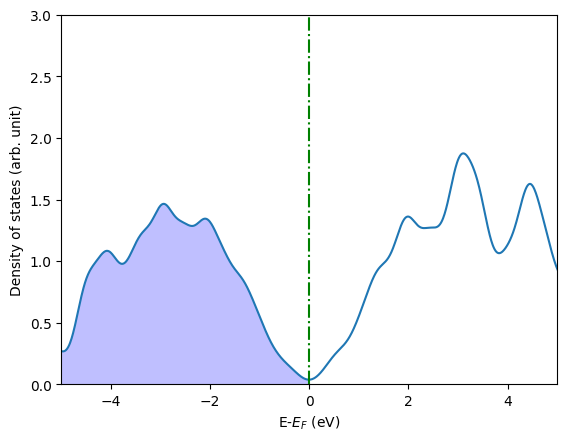

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(energies, DOS)
plt.xlabel('E-$E_F$ (eV)')
plt.ylabel('Density of states (arb. unit)')
plt.fill_between(energies, 0, DOS, where=(energies < 0), facecolor='blue', alpha=0.25)
plt.axvline(x=0,linestyle='-.',color='green')

plt.xlim([-5,5])
plt.ylim([0,3])
plt.show()



In [ ]:
#Other data available in xml file
import pprint
pprint.pprint(ds.data)

Streaming output truncated to the last 5000 lines.
                                                                 'k_point': {'#text': '-1.027832541300455E-010  '
                                                                                      '3.377975641056721E-001  '
                                                                                      '3.677474319265431E-001',
                                                                             '@weight': '6.0105184072126424E-003'},
                                                                 'npw': '1378',
                                                                 'occupations': {'#text': '1.000000000000000E+000  '
                                                                                          '1.000000000000000E+000  '
                                                                                          '1.000000000000000E+000\n'
                                                               

In [ ]:
pip freeze

absl-py==1.4.0
aiohttp==3.8.6
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.4.1
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
attrs==23.1.0
audioread==3.0.1
autograd==1.6.2
Babel==2.13.0
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.2.2
bqplot==0.12.40
branca==0.6.0
build==1.0.3
CacheControl==0.13.1
cachetools==5.3.1
catalogue==2.0.10
certifi==2023.7.22
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.0
chex==0.1.7
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.6
cmdstanpy==1.2.0
colorama==0.4.6
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.3
cons==0.4.6
contextlib2==21.6.0
contourpy==1.1.1
cryptography==41.0.4
cufflinks==0.17.3
cupy-cuda11x==11.0.0
cvxopt==1.3.2
cvxpy==1.3.2
cycler==0.12.1
cymem==2.0.8
Cython==3.0.3
dask==